In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
df["target"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [2]:
# 我們把我們擁有的資料集分成兩份, 一份測試, 一份訓練
from sklearn.model_selection import train_test_split
# 把資料分成兩部分(1. 訓練資料2. 測試資料)
x_train, x_test, y_train, y_test = train_test_split(boston['data'],boston['target'],test_size=0.1)

In [9]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=6)
reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=6)

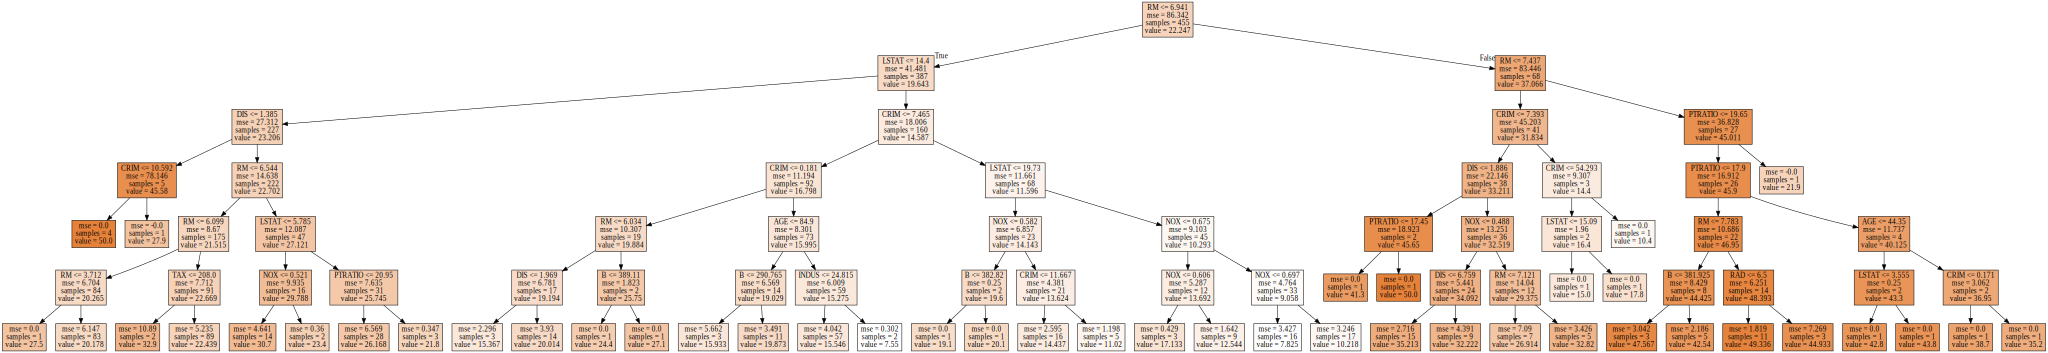

In [10]:
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg, out_file=None, feature_names=boston["feature_names"], filled=True)
graph = graphviz.Source(g)
graph

In [11]:
pre = reg.predict(x_test)
print("預測結果", list(pre))
print("實際結果", list(y_test))
from sklearn.metrics import r2_score
r2_score(y_test, pre)

預測結果 [30.7, 30.7, 15.545614035087718, 22.439325842696636, 20.178313253012035, 22.439325842696636, 49.33636363636364, 20.014285714285716, 20.014285714285716, 22.439325842696636, 35.21333333333333, 26.167857142857144, 22.439325842696636, 22.439325842696636, 20.014285714285716, 7.55, 32.82, 19.87272727272727, 22.439325842696636, 26.167857142857144, 22.439325842696636, 15.933333333333332, 44.93333333333334, 30.7, 20.178313253012035, 22.439325842696636, 44.93333333333334, 20.178313253012035, 32.82, 22.439325842696636, 15.545614035087718, 22.439325842696636, 30.7, 32.22222222222222, 15.545614035087718, 32.22222222222222, 22.439325842696636, 20.178313253012035, 19.87272727272727, 17.133333333333336, 30.7, 15.545614035087718, 30.7, 20.178313253012035, 20.014285714285716, 20.178313253012035, 20.178313253012035, 22.439325842696636, 14.437499999999998, 22.439325842696636, 15.545614035087718]
實際結果 [29.4, 28.0, 17.4, 24.8, 20.2, 22.3, 50.0, 18.8, 18.9, 22.3, 36.1, 30.1, 25.0, 24.2, 21.7, 15.7, 36.5

0.8185102588772076